<a href="https://colab.research.google.com/github/akkiyolo/pytorch/blob/main/07_Linear_Reegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 1) Design model(input,output size,forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute prediction
# - backward pass: gradients
# - update weights


In [10]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
# 0) Prepare the data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1)
x=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

y= y.view(y.shape[0],1)

n_samples, n_features = x.shape

In [12]:
# 1) model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)

In [13]:
# 2) loss and optimizer
learing_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learing_rate)

epoch: 10, loss = 4023.9851
epoch: 20, loss = 2446.6230
epoch: 30, loss = 1489.6143
epoch: 40, loss = 908.3102
epoch: 50, loss = 554.7658
epoch: 60, loss = 339.4409
epoch: 70, loss = 208.0966
epoch: 80, loss = 127.8443
epoch: 90, loss = 78.7198
epoch: 100, loss = 48.5896


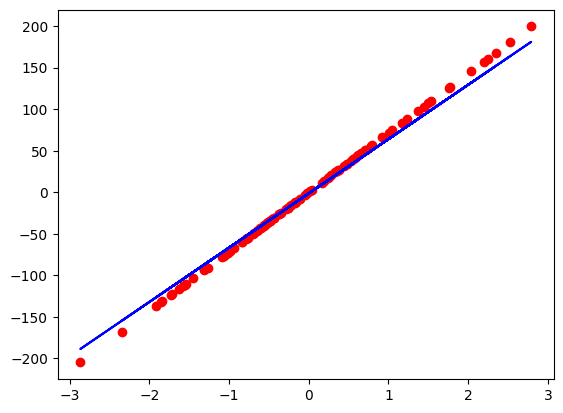

In [14]:
# 3) trainig loop
num_epochs=100
for epoch in range(num_epochs):

  # forward pass and loss
  y_predicted=model(x)
  loss=criterion(y_predicted,y)

  # backward pas
  loss.backward()

  # update
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted=model(x).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()